# House Price Prediction Model

**The task is to predict house prices based on various features such as the number of bedrooms, bathrooms, square footage, location, and other relevant attributes. The goal is to train a machine learning model that can accurately estimate house prices and assist in property valuation.**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings

In [2]:
df=pd.read_csv('BHP.csv')
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df.size

119880

In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [9]:
df.nunique()

area_type          4
availability      74
location         634
size              15
society         2592
total_sqft      1682
bath               8
balcony            4
price           1518
dtype: int64

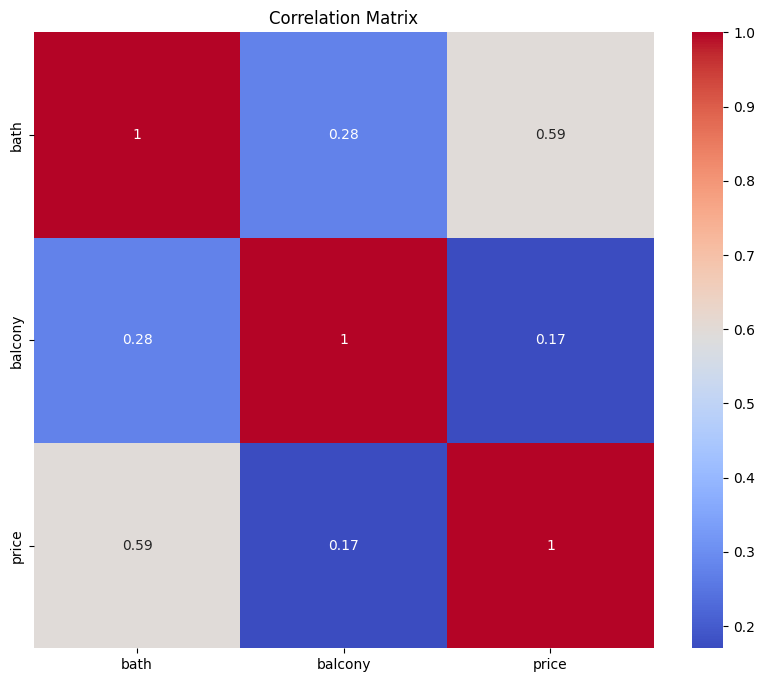

In [10]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preprocessing data

In [11]:
label_encoder=LabelEncoder()
for col in df.columns:
    if df[col].dtype =='object':
        df[col] = label_encoder.fit_transform(df[col])

In [12]:
feature_columns = df.drop('price', axis=1)
target_column='price'
x=feature_columns
y=df[target_column]

# Splitting Data and Model Building

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
predictions=model.predict(x_test)
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
print('Root Mean Squared Error:',rmse)

Root Mean Squared Error: 82.52086190268069


In [16]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [17]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,35,210,3,443,63,2.0,1.0,39.07
1,2,73,149,8,2353,1128,5.0,3.0,120.00
3,3,73,387,5,2109,551,3.0,1.0,95.00
5,3,73,625,3,585,192,2.0,1.0,38.00
11,2,73,625,8,1566,1163,5.0,3.0,295.00


In [18]:
#Predicting house Price for a new data

#New data
new_house_data = [[2,73,625,8,1566,1163,5.0,3.0]]

# Define the column names based on the original dataset's columns
new_house_columns = ['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony']

# Create a DataFrame with the data and column names
new_house_df = pd.DataFrame(new_house_data, columns=new_house_columns)



predicted_price = model.predict(new_house_df)

# Ensure the predicted price is positive
predicted_price = max(0, predicted_price)  # Ensure the price is not negative

print('Predicted_price:', predicted_price)

Predicted_price: [290.27248593]
